## E-COMMERCE SALES ANALYSIS

###  OBJECTIVE

The objective of this data analysis project is to gain valuable insights from the ecommerce sales data in order to optimize business strategies and drive revenue growth. By examining the sales data, we aim to identify patterns, trends, and factors influencing sales performance, customer behavior, and product popularity. The analysis will enable us to make data-driven decisions and develop actionable recommendations for improving the ecommerce platform's sales performance and overall customer satisfaction.

### QUESTIONS

1.  What are the best performing segments and products (by total amount sold)?
2. What is the sales growth over time?
3. Contribution towards profitability by product. (if other datasets are related)** remove
4. The most popular product category by state
5. Total number of cancelled and returned orders.
6. Highest amount of orders by city **remove
7. States with the highest orders.
8. Are there any seasonal or temporal trends that significantly affect sales patterns?
9. Which product categories or specific products are top performers in terms of sales volume and revenue?
10. Can we identify customer segments based on purchasing behavior and preferences?
11. Which regions have the highest sales volume? Are there any specific geographic areas with potential for growth?
12. Are there any notable differences in sales performance between B2B and B2C customers?
13. What is the distribution of order statuses? Are there any bottlenecks or areas for improvement in the order fulfillment process?
14. Are there any notable differences in sales performance based on the courier status or the method of shipping?
15. How does the fulfillment method (fulfilled-by) impact customer satisfaction and repeat purchases?
16. How does the order quantity (Qty) affect the average order value and revenue?
17. Is there a correlation between promotional activities (promotion-ids) and sales performance? Which promotions have the highest impact on sales?

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import difflib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Data Exploration

In [2]:
df= pd.read_csv('Amazon Sale Report.csv')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
df.shape

(128975, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


### DATA CLEANING

In [6]:
#change date to datetime 
df.Date = df.Date.astype('datetime64[ns]')

In [7]:
((df.isna().sum()/len(df))*100).sort_values(ascending = False)

fulfilled-by          69.546811
promotion-ids         38.110487
Unnamed: 22           38.030626
Amount                 6.043807
currency               6.043807
Courier Status         5.328164
ship-country           0.025586
ship-postal-code       0.025586
ship-state             0.025586
ship-city              0.025586
ship-service-level     0.000000
Order ID               0.000000
Date                   0.000000
Status                 0.000000
Fulfilment             0.000000
Sales Channel          0.000000
ASIN                   0.000000
Style                  0.000000
SKU                    0.000000
Category               0.000000
Size                   0.000000
Qty                    0.000000
B2B                    0.000000
index                  0.000000
dtype: float64

In [8]:
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

From the above results, there are 10 columns with null values, with one column having more than 50% of it's rows being null(empty). So we need to spend some time cleaning

In [9]:
df.nunique()

index                 128975
Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64

In [10]:
df.drop(columns= ['index', 'Unnamed: 22', 'currency'], inplace=True)

After checking for uniqueness in the data, it was oberved that the index, order id, and two other columns needed to be dropped. They contained either to much unique values or too few of them and they are needed for the analysis

In [11]:
#changing amt to zero where qty is 0
df.loc[df['Qty']==0, 'Amount'] = 0

In [12]:
df['Courier Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [13]:
df['ship-state'].isna().sum()

33

In [14]:
df['ship-city'].isna().sum()

33

In [15]:
df['ship-country'].value_counts()

IN    128942
Name: ship-country, dtype: int64

In [16]:
#filling the null values
df['fulfilled-by'] = df['fulfilled-by'].fillna('Unknown')
df['promotion-ids'] = df['promotion-ids'].fillna('Unknown')
df['Amount'] = df['Amount'].fillna(0)
df['Courier Status'] = df['Courier Status'].fillna('Cancelled')
df['ship-city'] = df['ship-city'].fillna(method = 'ffill')
df['ship-country'] = df['ship-country'].fillna(method = 'ffill')
df['ship-state'] = df['ship-state'].fillna(method = 'ffill')
df['ship-postal-code'] = df['ship-postal-code'].fillna(method = 'ffill')

In [17]:
df['Revenue'] = df.Qty * df.Amount

In [18]:
df.isna().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Revenue               0
dtype: int64

In [19]:
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi',
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

Due to the inconsistency in the data for some categorical columns, we need to further clean.

##### CLEANING CATEGORICAL VALUES

In [41]:
cat_col = [i for i in df.select_dtypes(include=['object', 'category'])]
num_col = [i for i in df.select_dtypes(include=['int64', 'float64'])]

In [21]:
df[cat_col] = df[cat_col].apply(lambda x: x.str.lower())

In [22]:
for col in cat_col:
    print("Total Number of unique values in the {} Column : {}". format(col, len(df[col].unique().tolist())))
    print('\n')

Total Number of unique values in the Order ID Column : 120378


Total Number of unique values in the Status Column : 13


Total Number of unique values in the Fulfilment Column : 2


Total Number of unique values in the Sales Channel  Column : 2


Total Number of unique values in the ship-service-level Column : 2


Total Number of unique values in the Style Column : 1377


Total Number of unique values in the SKU Column : 7195


Total Number of unique values in the Category Column : 9


Total Number of unique values in the Size Column : 11


Total Number of unique values in the ASIN Column : 7190


Total Number of unique values in the Courier Status Column : 3


Total Number of unique values in the ship-city Column : 7297


Total Number of unique values in the ship-state Column : 47


Total Number of unique values in the ship-country Column : 1


Total Number of unique values in the promotion-ids Column : 5788


Total Number of unique values in the fulfilled-by Column : 2




In [23]:
for col in ['Sales Channel ', 'Status', 'Category', 'ship-country', 'fulfilled-by', 'ship-state', 'Fulfilment']:
    print(f"set of values in the {col}: {set(df[col])}")
    print('\n')

set of values in the Sales Channel : {'amazon.in', 'non-amazon'}


set of values in the Status: {'pending', 'shipped - out for delivery', 'shipped - delivered to buyer', 'shipped - picked up', 'shipped - returning to seller', 'shipped - rejected by buyer', 'shipping', 'shipped - lost in transit', 'shipped', 'shipped - returned to seller', 'shipped - damaged', 'cancelled', 'pending - waiting for pick up'}


set of values in the Category: {'set', 'western dress', 'bottom', 'blouse', 'top', 'saree', 'kurta', 'dupatta', 'ethnic dress'}


set of values in the ship-country: {'in'}


set of values in the fulfilled-by: {'easy ship', 'unknown'}


set of values in the ship-state: {'andhra pradesh', 'mizoram', 'dadra and nagar', 'meghalaya', 'haryana', 'sikkim', 'chandigarh', 'tripura', 'west bengal', 'andaman & nicobar ', 'apo', 'uttarakhand', 'ar', 'orissa', 'assam', 'chhattisgarh', 'gujarat', 'nl', 'punjab/mohali/zirakpur', 'rajasthan', 'nagaland', 'jammu & kashmir', 'uttar pradesh', 'punjab',

In [24]:
# Define the set of correct values of ship-state
correct_values = {'madhya pradesh', 'sikkim', 'uttarakhand', 'chhattisgarh', 'karnataka', 'dadra and nagar',
                  'tamil nadu', 'haryana', 'ar', 'west bengal', 'nl', 'telangana', 'bihar', 'meghalaya',
                  'new delhi', 'punjab/mohali/zirakpur', 'uttar pradesh', 'andhra pradesh', 'tripura', 'rj',
                  'chandigarh', 'assam', 'ladakh', 'pondicherry', 'rajasthan', 'kerala', 'pb', 'nagaland',
                  'gujarat', 'rajasthan', 'goa', 'lakshadweep', 'jharkhand', 'mizoram', 'odisha', 'puducherry',
                  'apo', 'jammu & kashmir', 'arunachal pradesh', 'delhi', 'rajsthan', 'maharashtra',
                  'himachal pradesh', 'manipur', 'andaman & nicobar', 'punjab'}

In [25]:
# Function to clean up the ship-state values
def clean_state(state):
    state = state.lower().strip()  # Convert to lowercase and remove leading/trailing spaces
    if state in correct_values:
        return state
    else:
        # Perform fuzzy matching to find the closest correct value
        closest_match = difflib.get_close_matches(state, correct_values, n=1)
        if closest_match:
            return closest_match[0]
        else:
            return None

In [26]:
# Apply the clean_state function to the 'ship-state' column
df['ship-state'] = df['ship-state'].apply(clean_state)

# Remove rows with None values (unmatched states)
df = df.dropna(subset=['ship-state'])

# Print the cleaned unique values in the 'ship-state' column
print(df['ship-state'].unique())


['maharashtra' 'karnataka' 'puducherry' 'tamil nadu' 'uttar pradesh'
 'chandigarh' 'telangana' 'andhra pradesh' 'rajasthan' 'delhi' 'haryana'
 'assam' 'jharkhand' 'chhattisgarh' 'odisha' 'kerala' 'madhya pradesh'
 'west bengal' 'nagaland' 'gujarat' 'uttarakhand' 'bihar'
 'jammu & kashmir' 'punjab' 'himachal pradesh' 'arunachal pradesh'
 'manipur' 'goa' 'meghalaya' 'tripura' 'ladakh' 'dadra and nagar' 'sikkim'
 'andaman & nicobar' 'rajsthan' 'nl' 'mizoram' 'new delhi'
 'punjab/mohali/zirakpur' 'rj' 'lakshadweep' 'pb' 'apo' 'ar' 'pondicherry']


In [27]:
df.nunique()

Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
Amount                   867
ship-city               7297
ship-state                45
ship-postal-code        9459
ship-country               1
promotion-ids           5788
B2B                        2
fulfilled-by               2
Revenue                  925
dtype: int64

The dimension in ship city field is high and there are so many inconsistencies so we drop it.

In [28]:
df.drop('ship-city', axis=1, inplace=True)

In [29]:
df.shape

(128975, 21)

In [30]:
df.duplicated().sum()

6

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated().sum()

0

In [33]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month_name()
df['day'] = df['Date'].dt.day_name()

In [34]:
df.shape

(128969, 24)

### DATA EXPLORATION

check for correlation

<AxesSubplot:>

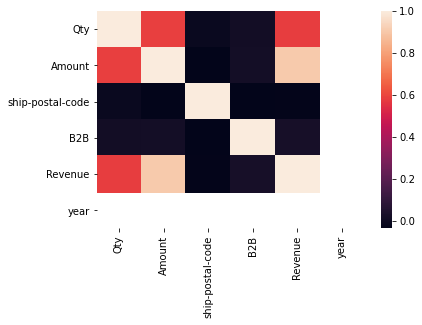

In [37]:
corr = df.corr()

sb.heatmap(corr)

stats summary of the numerical columns

In [43]:
df[num_col].describe()

,Qty,Amount,ship-postal-code,Revenue,year
count,128969.00000,128969.000000,128969.000000,128969.000000,128969.0
mean,0.90445,584.635618,463968.016531,589.535245,2022.0
std,0.31333,331.595089,191475.224780,386.778622,0.0
min,0.00000,0.000000,110001.000000,0.000000,2022.0
25%,1.00000,399.000000,382421.000000,399.000000,2022.0
50%,1.00000,568.000000,500033.000000,568.000000,2022.0
75%,1.00000,771.000000,600024.000000,771.000000,2022.0
max,15.00000,5584.000000,989898.000000,44672.000000,2022.0


In [84]:
# a subset of the data where amount is not zero
df_ = df[df['Amount'] != 0]

In [85]:
df_.describe()

,Qty,Amount,ship-postal-code,Revenue,year
count,113698.000000,113698.000000,113698.000000,113698.000000,113698.0
mean,1.003852,663.159167,463890.283127,668.716873,2022.0
std,0.073386,269.536036,190894.904880,341.672477,0.0
min,1.000000,199.000000,110001.000000,199.000000,2022.0
25%,1.000000,459.000000,382480.000000,459.000000,2022.0
50%,1.000000,625.000000,500033.000000,625.000000,2022.0
75%,1.000000,788.000000,600019.000000,788.000000,2022.0
max,8.000000,5584.000000,855117.000000,44672.000000,2022.0


In [47]:
df['Qty'].value_counts()

1     115777
0      12804
2        341
3         32
4          9
5          2
15         1
13         1
9          1
8          1
Name: Qty, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128969 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128969 non-null  object        
 1   Date                128969 non-null  datetime64[ns]
 2   Status              128969 non-null  object        
 3   Fulfilment          128969 non-null  object        
 4   Sales Channel       128969 non-null  object        
 5   ship-service-level  128969 non-null  object        
 6   Style               128969 non-null  object        
 7   SKU                 128969 non-null  object        
 8   Category            128969 non-null  object        
 9   Size                128969 non-null  object        
 10  ASIN                128969 non-null  object        
 11  Courier Status      128969 non-null  object        
 12  Qty                 128969 non-null  int64         
 13  Amount              128969 no

Distribution for numerical columns

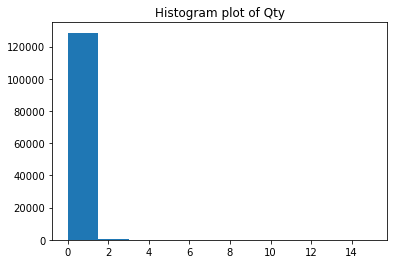

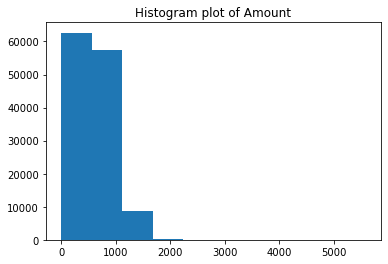

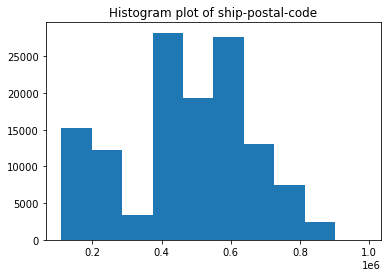

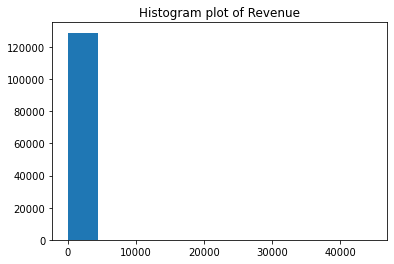

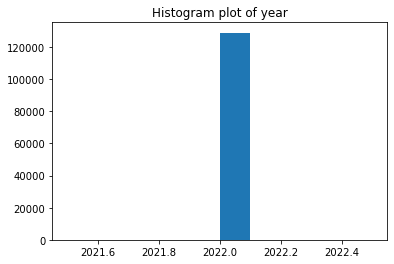

In [46]:
for i in num_col:
    plt.hist(df[i])
    plt.title(f'Histogram plot of {i}')
    plt.show()

Box plot of numerical columns

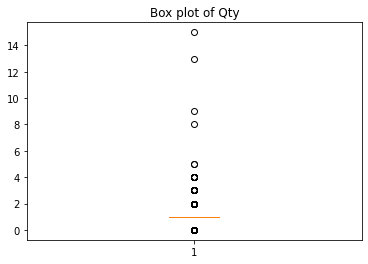

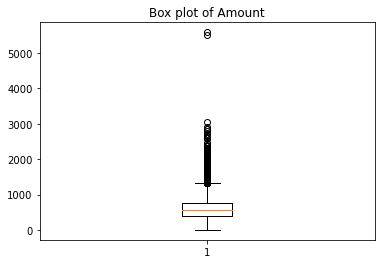

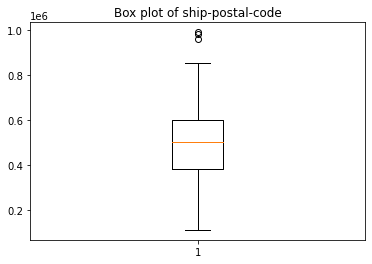

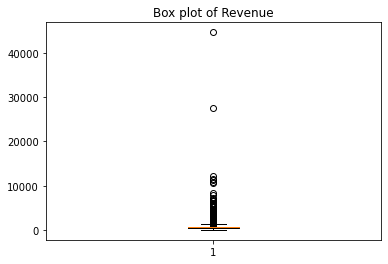

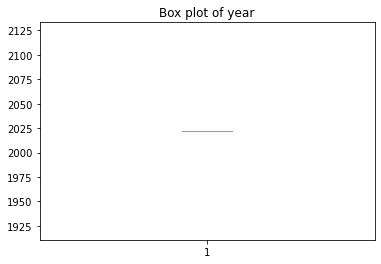

In [86]:
for i in num_col:
    plt.boxplot(df[i])
    plt.title(f'Box plot of {i}')
    plt.show()

Bar chart to visualize the count of the data for the categorical data

Text(0.5, 1.0, 'Count plot for the Status Column')

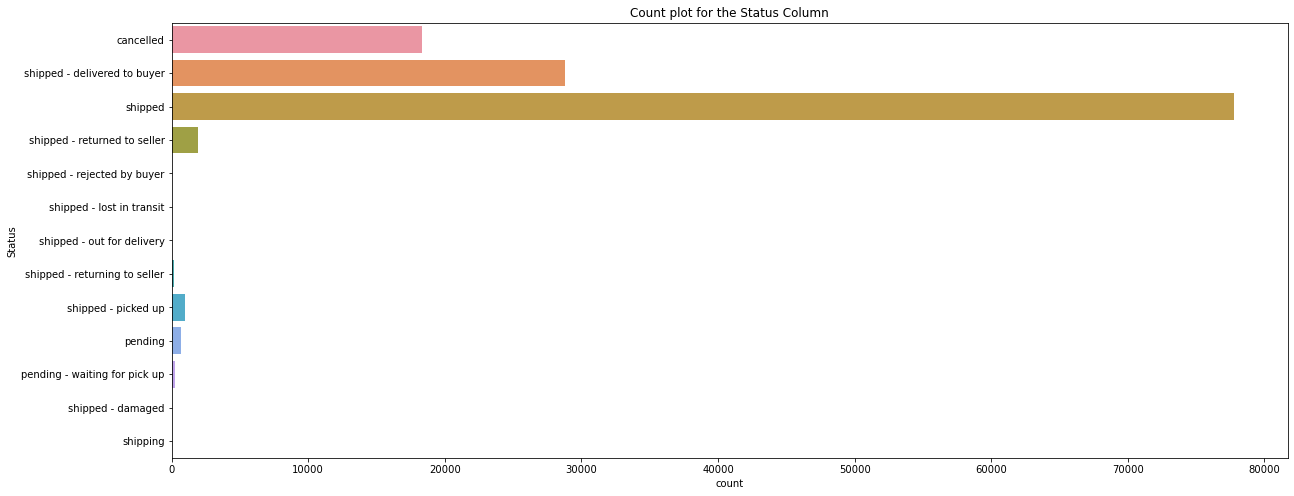

In [57]:
cat_col_ = ['Status', 'Fulfilment', 'Sales Channel ', 'Category', 'Size', 'ASIN','Courier Status', 'fulfilled-by', 'month','day']

plt.figure(figsize=(20,8))
sb.countplot(y='Status', data=df)
plt.title('Count plot for the Status Column')

<AxesSubplot:title={'center':'Distribution of order fulfilment'}, ylabel='Order ID'>

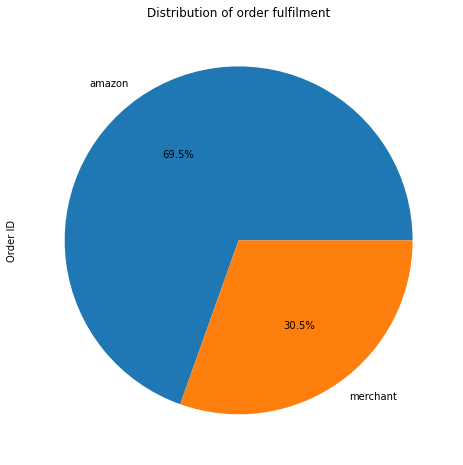

In [68]:
plt.figure(figsize=(10,8))

df.groupby('Fulfilment')['Order ID'].count() \
.plot.pie(
autopct='%1.1f%%',
    title='Distribution of order fulfilment'
)

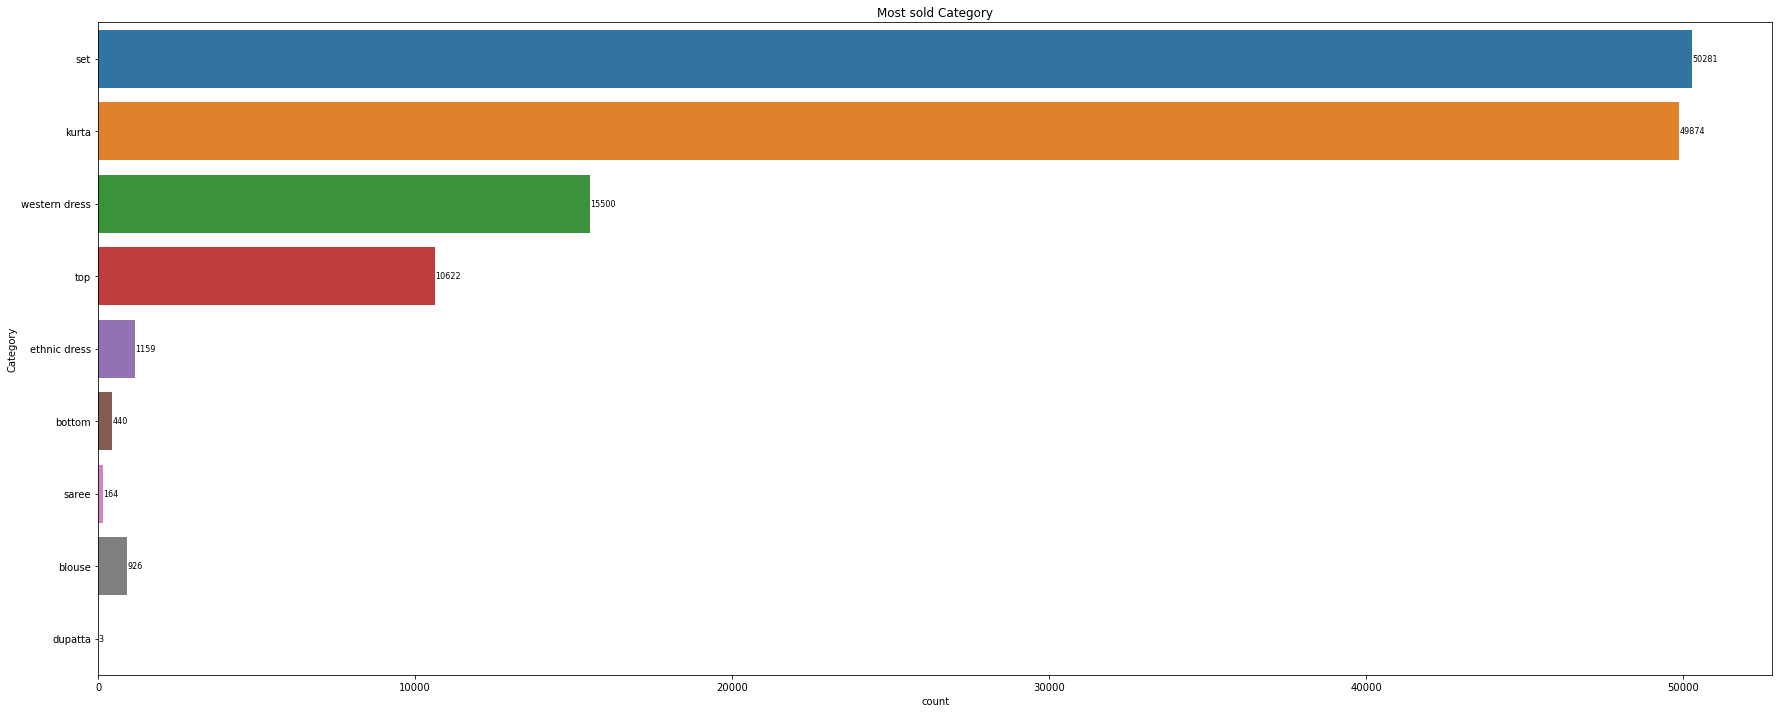

In [63]:
plt.figure(figsize=(30,12))
ax = sb.countplot(y='Category', data=df)

label_offset = 5
label_fontsize = 8
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + label_offset, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=label_fontsize)

ax.set_title('Most sold Category')

plt.show()

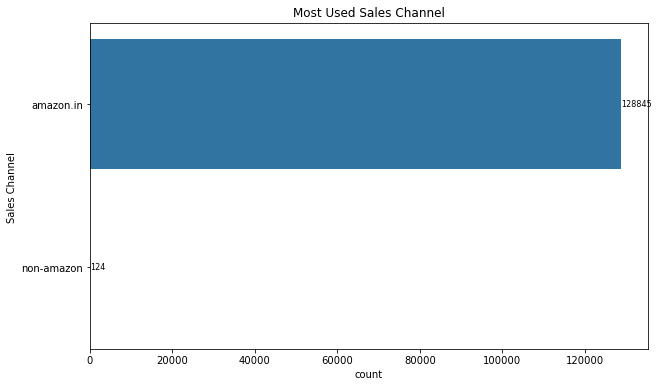

In [77]:
plt.figure(figsize=(10,6))
ax = sb.countplot(y='Sales Channel ', data=df)

label_offset = 5
label_fontsize = 8
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + label_offset, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=label_fontsize)

ax.set_title('Most Used Sales Channel')

plt.show()

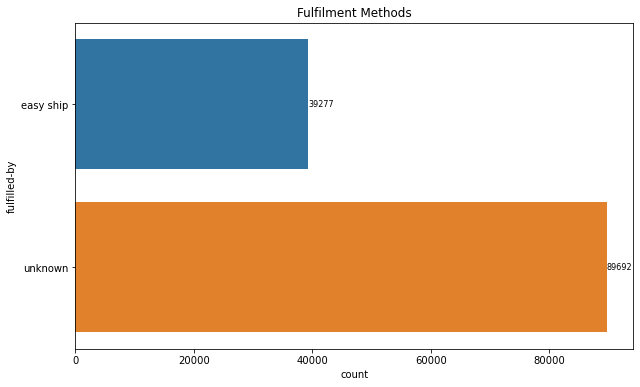

In [79]:
plt.figure(figsize=(10,6))
ax = sb.countplot(y='fulfilled-by', data=df)

label_offset = 5
label_fontsize = 8
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + label_offset, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=label_fontsize)

ax.set_title('Fulfilment Methods')

plt.show()

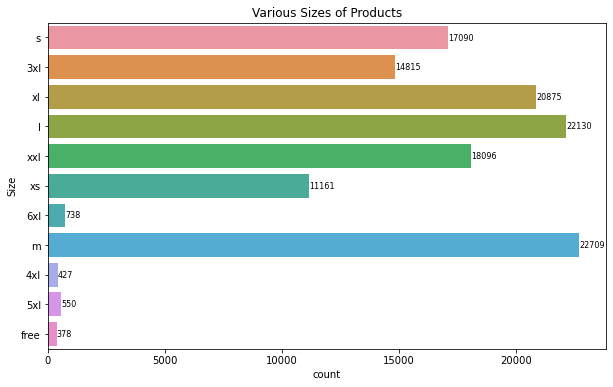

In [82]:
plt.figure(figsize=(10,6))
ax = sb.countplot(y='Size', data=df)

label_offset = 5
label_fontsize = 8
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + label_offset, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=label_fontsize)

ax.set_title('Various Sizes of Products')

plt.show()

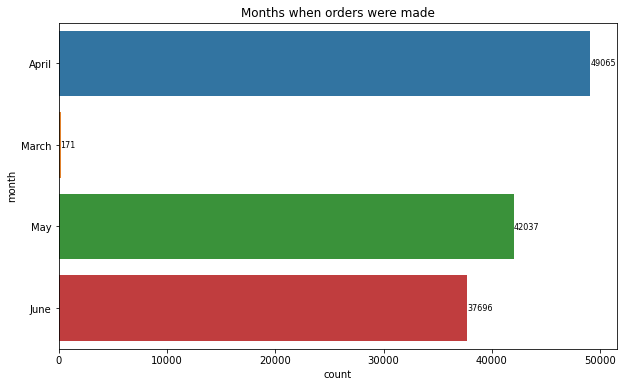

In [83]:
plt.figure(figsize=(10,6))
ax = sb.countplot(y='month', data=df)

label_offset = 5
label_fontsize = 8
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + label_offset, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=label_fontsize)

ax.set_title('Months when orders were made')

plt.show()

#### Summary of  Data Exploration

1. 

<AxesSubplot:xlabel='Size', ylabel='Amount'>

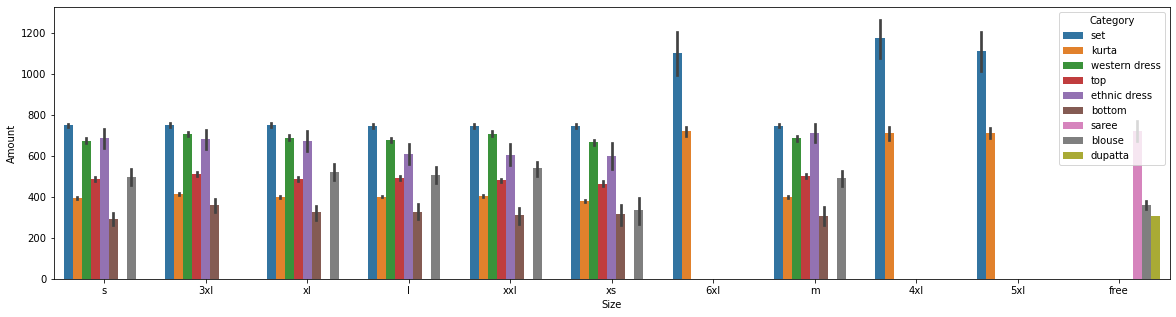

In [81]:
fig, ax=plt.subplots(figsize=(20,5))
sb.barplot(df['Size'],df['Amount'],hue=df['Category'])